# Linear Regression with Stochastic Gradient Descent

Write a program which computes the solution using stochastic gradient descent.  You may use a minibatch size of 5 data points. For convergence, remember to decrease the learning rate over time.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys

data = np.genfromtxt('linear.csv', delimiter=',')

learn_rate = .1
num_samples = data.shape[0]
print("No. of samples:", num_samples)

np.random.shuffle(data)
X = data[:,1:]
Y = data[:,0]

print("Features, X: ", X.shape)
print("Response, Y: ", Y.shape)

No. of samples: 50
Features, X:  (50, 4)
Response, Y:  (50,)


We decide to shuffle and sample without replacement. 

Define the function `get_minibatch` to extract a mini batch of data.

`get_minibatch_grad` will predict values `y_pred` for the current theta, compute the error, then calculate the gradient of the loss.

In [5]:
def get_minibatch(data, start_index, batch_size):
    X = data[:,1:]
    Y = data[:,0]
    X_mini = X[start_index:start_index+batch_size]
    Y_mini = Y[start_index:start_index+batch_size]
    return X_mini, Y_mini

def get_minibatch_grad(minibatch, theta):
    minibatch_X = minibatch[0] # 5 samples, 4 features each incl. 1 constant feature
    minibatch_Y = minibatch[1]
    y_pred = minibatch_X.dot(theta)
    err = minibatch_Y - y_pred.squeeze()
    grad = -minibatch_X.T.dot(err) / minibatch[0].shape[0]
    
    # Prints for visualization, if I ever need them again
    # print("THE X FEATURES:" ,minibatch_X.shape, minibatch_X)
    # print("THE ACTUAL Y LABELS:" ,minibatch_Y.shape, minibatch_Y)
    # print("PREDICTED Y VALS FOR THIS 5-BATCH OF X: ", y_pred.shape, y_pred)
    # print("PREDICTED Y SQUEEZED: ", y_pred.squeeze().shape, y_pred.squeeze())
    # print("ERR FOR EACH OF 5 SAMPLES: ", err)
    # print("GRAD: ", grad.shape, grad)
    
    return grad
    

def sgd(theta_init, learn_rate_init, batch_size):
    theta = theta_init
    learn_rate = learn_rate_init
    loss = 0
    for i in range(0, num_samples, batch_size):
        minibatch = get_minibatch(data, i, batch_size)
        batch_grad = get_minibatch_grad(minibatch, theta)
        theta = theta.squeeze() - learn_rate * batch_grad
        learn_rate = learn_rate/(1+i)
        loss = (1/batch_size)*np.sum(Y-X.dot(theta))
        
        # Prints for visualization
        # print("BATCHGRAD", batch_grad.shape, batch_grad)
        # print("THETA OLD", theta.shape, theta)
        # print("THETA NEW", theta.shape, theta)
        # print("LEARN RATE", learn_rate)
        
    return loss, theta
        
theta_init = np.zeros((1,4)).T
#np.random.normal(0,1,4)
prev_loss = sys.maxsize
theta = theta_init
losses = [] # for plotting
iteration = 0 # for plotting

for i in range(50):
    iteration += 1
    loss, theta = sgd(theta ,learn_rate, 5)
    print("LOSS: ", loss)
    np.random.shuffle(data)
    losses.append(loss)

LOSS:  -14.508906365750427
LOSS:  -10.336810182153627
LOSS:  -8.048858661187579
LOSS:  -6.259886860943972
LOSS:  -4.983170219150994
LOSS:  -3.9166703434866195
LOSS:  -3.0595532610304312
LOSS:  -2.568885173956148
LOSS:  -1.9284494665198229
LOSS:  -1.9609026110109125
LOSS:  -1.6750851497043031
LOSS:  -1.2999262595455026
LOSS:  -0.9625996749750784
LOSS:  -0.7556740121861655
LOSS:  -0.6836626238352868
LOSS:  -0.5774562102688272
LOSS:  -0.4667761772512634
LOSS:  -0.43040469551451255
LOSS:  -0.4445083026572769
LOSS:  -0.3644654236632398
LOSS:  -0.3014530360429683
LOSS:  -0.30884330185965686
LOSS:  -0.16603369521424619
LOSS:  -0.11035572099170961
LOSS:  -0.00883193849972067
LOSS:  0.0007725086610927412
LOSS:  -0.04004584583426109
LOSS:  -0.05375931706516716
LOSS:  0.012731930603514463
LOSS:  -0.08827669618288123
LOSS:  -0.10126887121694633
LOSS:  -0.043555436221296776
LOSS:  -0.07708675599171184
LOSS:  -0.036635868009403605
LOSS:  -0.07579066335696669
LOSS:  -0.0047743391219796545
LOSS:  0.00

In [6]:
print(theta)

[-0.56196432  1.36263461  0.00722147 -1.89146115]


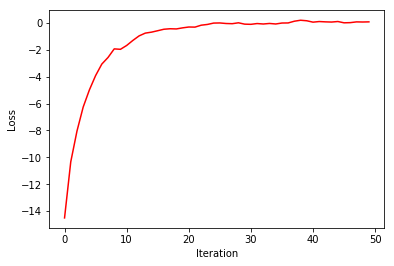

In [7]:
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.plot(np.arange(iteration), losses, 'r')
plt.show()